# Activity models for aqueous species

In [213]:
from reaktoro import *
db = Database("supcrt98.xml")
editor = ChemicalEditor(db)
editor.addAqueousPhaseWithElements("H O C Na Cl Ca")
editor.addGaseousPhase(["H2O(g)"])

system = ChemicalSystem(editor)
print(system)

T = 25 # celsius
P = 1 # bar

problem1 = EquilibriumProblem(system)
problem1.setTemperature(T, "celsius")
problem1.setPressure(P, "bar")
problem1.add("H2O", 1, "kg")
problem1.add("NaCl", 1, "mol")

Aqueous                  Gaseous                  
----------------------------------------------------------------------------------------------------
CO(aq)                   H2O(g)                   
CO2(aq)                                           
CO3--                                             
Ca(HCO3)+                                         
Ca++                                              
CaCO3(aq)                                         
CaCl+                                             
CaCl2(aq)                                         
CaOH+                                             
Cl-                                               
ClO-                                              
ClO2-                                             
ClO3-                                             
ClO4-                                             
H+                                                
H2(aq)                                            
H2O(l)                          

In [214]:
state1 = equilibrate(problem1)
print(state1)

Temperature [K]          Temperature [C]          Pressure [Pa]            Pressure [bar]           
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
298.15                   25                       100000                   1                        
Element                  Amount [mol]             Aqueous [mol]            Gaseous [mol]            Dual Potential [kJ/mol]  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C                        6e-20                    6e-20                    0                        0                        
Ca                       6e-20                    6e-20                    0                  

In [215]:
problem2 = EquilibriumProblem(system)
problem2.setTemperature(T, "celsius")
problem2.setPressure(P, "bar")
problem2.add("H2O", 1, "kg")
problem2.add("CaCl2", 1, "mol")

In [216]:
state2 = equilibrate(problem2)
print(state2)

Temperature [K]          Temperature [C]          Pressure [Pa]            Pressure [bar]           
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
298.15                   25                       100000                   1                        
Element                  Amount [mol]             Aqueous [mol]            Gaseous [mol]            Dual Potential [kJ/mol]  
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C                        6e-20                    6e-20                    0                        0                        
Ca                       1                        1                        0                  

In [217]:
# Calculate mass of the solvent water
mw_H2O = 1000 / 18.0154 # where 18.0154 g/mol as an approximated molar mass of water
print(f"mw_H2O = {mw_H2O} kg / mol")

mw_H2O = 55.50806532189127 kg / mol


In [218]:
# Collect system species and their amounts
species = system.species()
n = state2.speciesAmounts()

Fetching *indicies of aqueous species* and indices all species:

In [220]:
indx_aqueous_phase = 0
indx_gaseous_phase = 1

indx_aq = system.indicesSpeciesInPhases([indx_aqueous_phase]) 
print("Indices of aquoues species:", indx_aq)
print("Indices of all species:", system.indicesSpeciesInPhases([indx_aqueous_phase, indx_gaseous_phase]) )

Indices of aquoues species: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Indices of all species: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


Collecting list of *aqueous species*, their names, and corresponding charges:

In [221]:
species_aq = [species[i] for i in indx_aq]
n_aq = [n[i] for i in indx_aq]
names_aq = [species.name() for species in species_aq]
Z_aq = [species.charge() for species in species_aq]

In [223]:
# Concetration of water
n_H2O = state2.speciesAmount("H2O(l)")

In [224]:
import numpy as np # for divide function

# Molalities of aqueous species
m_aq = mw_H2O * np.divide(n_aq, n_H2O)
for name, Z, m in zip(names_aq, Z_aq, m_aq):
    print(f"{name:>10} : \t{Z:2.0f}, \t{m:6.2e} mol/kg")

    CO(aq) : 	 0, 	1.00e-20 mol/kg
   CO2(aq) : 	 0, 	1.00e-20 mol/kg
     CO3-- : 	-2, 	1.00e-20 mol/kg
 Ca(HCO3)+ : 	 1, 	1.00e-20 mol/kg
      Ca++ : 	 2, 	7.77e-01 mol/kg
 CaCO3(aq) : 	 0, 	1.00e-20 mol/kg
     CaCl+ : 	 1, 	1.64e-01 mol/kg
 CaCl2(aq) : 	 0, 	5.96e-02 mol/kg
     CaOH+ : 	 1, 	2.34e-07 mol/kg
       Cl- : 	-1, 	1.72e+00 mol/kg
      ClO- : 	-1, 	2.61e-22 mol/kg
     ClO2- : 	-1, 	9.14e-23 mol/kg
     ClO3- : 	-1, 	6.70e-23 mol/kg
     ClO4- : 	-1, 	5.03e-23 mol/kg
        H+ : 	 1, 	2.65e-07 mol/kg
    H2(aq) : 	 0, 	2.06e-21 mol/kg
    H2O(l) : 	 0, 	5.55e+01 mol/kg
  H2O2(aq) : 	 0, 	2.37e-22 mol/kg
     HCO3- : 	-1, 	1.00e-20 mol/kg
   HCl(aq) : 	 0, 	3.74e-08 mol/kg
  HClO(aq) : 	 0, 	2.71e-22 mol/kg
 HClO2(aq) : 	 0, 	8.28e-23 mol/kg
      HO2- : 	-1, 	1.89e-22 mol/kg
       Na+ : 	 1, 	1.00e-20 mol/kg
  NaCl(aq) : 	 0, 	1.00e-20 mol/kg
  NaOH(aq) : 	 0, 	1.00e-20 mol/kg
    O2(aq) : 	 0, 	1.74e-22 mol/kg
       OH- : 	-1, 	6.85e-08 mol/kg


Calculating ionic strength (IS):

In [226]:
IS = 1/2 * sum([m * Z**2 for Z, m in zip(Z_aq, m_aq)])
print("Ionic strength = ", IS)

Ionic strength =  2.4936069847417155


Calculation activity coefficients for aqueous ionic species using Davis model: 

In [227]:
import math 
A_gamma = 0.5095
gamma = [10 ** (-A_gamma * Z**2 * (math.sqrt(IS)/(1 + math.sqrt(IS)) - 0.3 * IS)) for Z in Z_aq]

In [228]:
for name, gamma_i in zip(names_aq, gamma):
    print(f"{name:>10} : \t{gamma_i:2.2f}")

    CO(aq) : 	1.00
   CO2(aq) : 	1.00
     CO3-- : 	1.89
 Ca(HCO3)+ : 	1.17
      Ca++ : 	1.89
 CaCO3(aq) : 	1.00
     CaCl+ : 	1.17
 CaCl2(aq) : 	1.00
     CaOH+ : 	1.17
       Cl- : 	1.17
      ClO- : 	1.17
     ClO2- : 	1.17
     ClO3- : 	1.17
     ClO4- : 	1.17
        H+ : 	1.17
    H2(aq) : 	1.00
    H2O(l) : 	1.00
  H2O2(aq) : 	1.00
     HCO3- : 	1.17
   HCl(aq) : 	1.00
  HClO(aq) : 	1.00
 HClO2(aq) : 	1.00
      HO2- : 	1.17
       Na+ : 	1.17
  NaCl(aq) : 	1.00
  NaOH(aq) : 	1.00
    O2(aq) : 	1.00
       OH- : 	1.17


> **Note**: In an ideal solution, $\gamma_i$ = 1 for all species. 

In [230]:
A_gamma = 0.5095
I = np.linspace(0, 1, 100)

def gamma_davies(Zi, I):
    sqrtI = np.sqrt(I)
    return 10**(-A_gamma * Zi**2 * (sqrtI / (1.0 + sqrtI) - 0.3 * I))

# Coefficients
gamma_Z1 = gamma_davies(1.0, I)
gamma_Z2 = gamma_davies(2.0, I)
gamma_Z3 = gamma_davies(3.0, I)

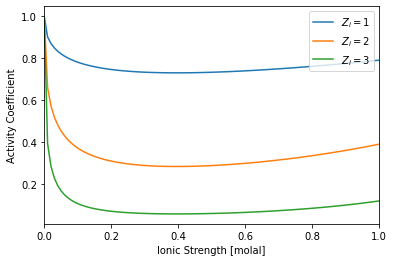

<Figure size 432x288 with 0 Axes>

In [231]:
import matplotlib.pyplot as plt
plt.xlim((0, 1.0))
plt.xlabel('Ionic Strength [molal]')
plt.ylabel('Activity Coefficient')
line_Z1, = plt.plot(I, gamma_Z1, label=r'$Z_i=1$')
line_Z2, = plt.plot(I, gamma_Z2, label=r'$Z_i=2$')
line_Z3, = plt.plot(I, gamma_Z3, label=r'$Z_i=3$')
plt.legend(handles=[line_Z1, line_Z2, line_Z3], loc='upper right')
plt.show()
plt.savefig('activity-coefficient-davies.pdf')

Calculation of activity of the water solvent:

In [232]:
# Collecting the species fractures
properties = state2.properties()
fractions = properties.moleFractions().val
for name, x in zip(names_aq, fractions):
    print(f"{name:>10} : \t{x:6.4e}")

    CO(aq) : 	1.7175e-22
   CO2(aq) : 	1.7175e-22
     CO3-- : 	1.7175e-22
 Ca(HCO3)+ : 	1.7175e-22
      Ca++ : 	1.3338e-02
 CaCO3(aq) : 	1.7175e-22
     CaCl+ : 	2.8136e-03
 CaCl2(aq) : 	1.0232e-03
     CaOH+ : 	4.0174e-09
       Cl- : 	2.9489e-02
      ClO- : 	4.4894e-24
     ClO2- : 	1.5704e-24
     ClO3- : 	1.1503e-24
     ClO4- : 	8.6371e-25
        H+ : 	4.5515e-09
    H2(aq) : 	3.5334e-23
    H2O(l) : 	9.5334e-01
  H2O2(aq) : 	4.0646e-24
     HCO3- : 	1.7175e-22
   HCl(aq) : 	6.4228e-10
  HClO(aq) : 	4.6526e-24
 HClO2(aq) : 	1.4228e-24
      HO2- : 	3.2450e-24
       Na+ : 	1.7175e-22
  NaCl(aq) : 	1.7175e-22
  NaOH(aq) : 	1.7175e-22
    O2(aq) : 	2.9953e-24
       OH- : 	1.1763e-09


In [233]:
# Index of water in the chemical system
indx_H2O = system.indexSpecies("H2O(l)") 
print("Index of the water solvent is", indx_H2O)
print("Fraction of the water solvent is", fractions[indx_H2O])

Index of the water solvent is 16
Fraction of the water solvent is 0.9533361522006862
